In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
# Generate a hypothetical dataset with noise
np.random.seed(42)
data_size = 1000
X = np.random.rand(data_size, 1) * 10
y_linear = 3 * X.squeeze() + np.random.randn(data_size) * 2  # Linear relationship
y_logistic = (X.squeeze() > 5).astype(int)  # Binary classification

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_linear_train, y_linear_test = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train, X_test, y_logistic_train, y_logistic_test = train_test_split(X, y_logistic, test_size=0.2, random_state=42)


In [4]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_linear_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_linear_test, linear_predictions)

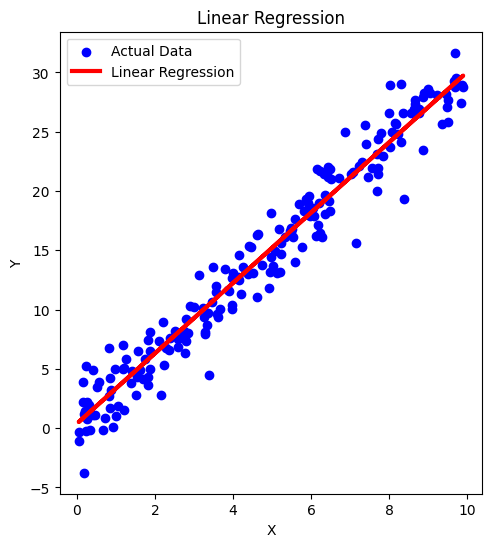

In [5]:
# Visualization of Linear Regression
plt.figure(figsize=(12, 6))

# Scatter plot for actual data
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_linear_test, color='blue', label='Actual Data')
plt.plot(X_test, linear_predictions, color='red', linewidth=3, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [6]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_logistic_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]  # Probability of class 1
logistic_accuracy = accuracy_score(y_logistic_test, logistic_predictions)

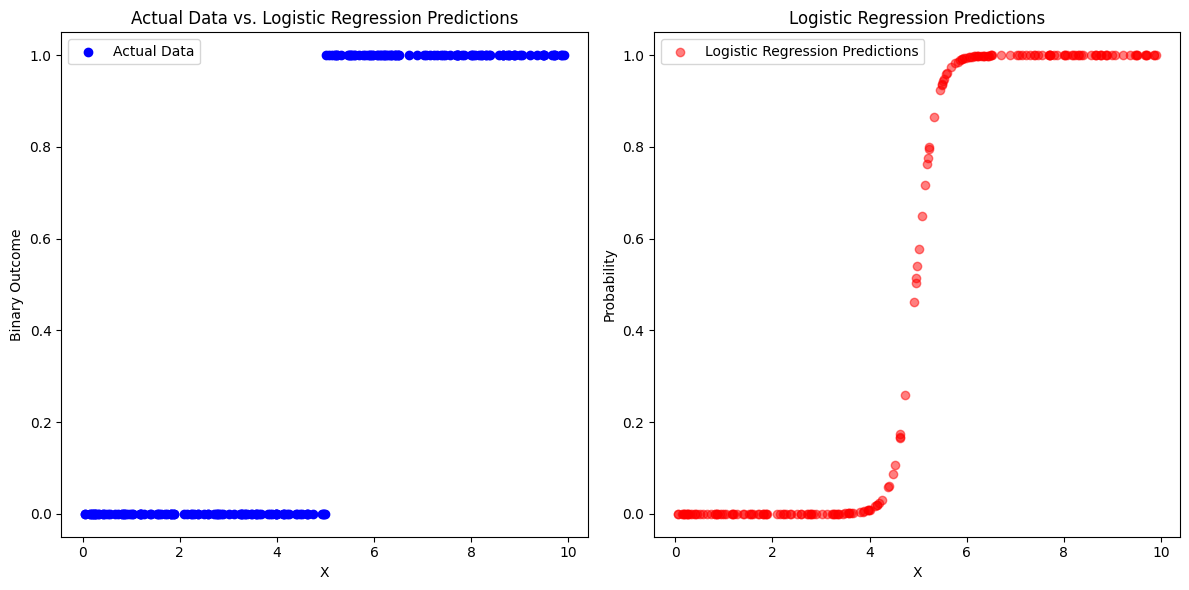

In [7]:
# Visualization of Logistic Regression Predictions
plt.figure(figsize=(12, 6))

# Scatter plot for actual data
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_logistic_test, color='blue', label='Actual Data')
plt.title('Actual Data vs. Logistic Regression Predictions')
plt.xlabel('X')
plt.ylabel('Binary Outcome')
plt.legend()

# Scatter plot for Logistic Regression Predictions (Probabilities)
plt.subplot(1, 2, 2)
plt.scatter(X_test, logistic_probabilities, color='red', label='Logistic Regression Predictions', alpha=0.5)
plt.title('Logistic Regression Predictions')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

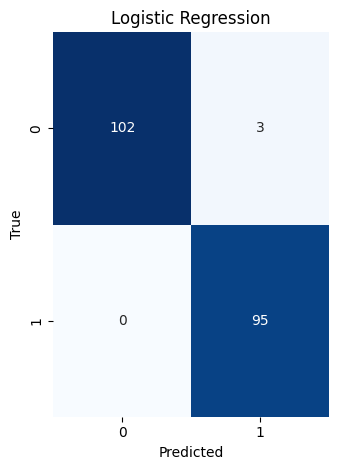

In [8]:

# Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_logistic_test, logistic_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [9]:
# Report on the models
print("Linear Regression MSE:", linear_mse)
print("Logistic Regression Accuracy:", logistic_accuracy)

Linear Regression MSE: 3.4294898663270157
Logistic Regression Accuracy: 0.985
